# Explore here

In [3]:
#Librerias a importar
import pandas as pd

In [4]:
#Conversion de cvs a dataframe

nyc_data = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
nyc_data.shape
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Hay un total de 48895 registros cuya información esta repartida en 16 columnas, de las cuales:
- 8 son categóricas (id,name, host_id, host_name,neighbourhood_group, neighbourhood, room_type, availability_365)
- 8 son numéricas (latitud, longitud, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)
- Hay 4 columnas cuya informacion esta incompleta (Nan), siendo last_review y reviews_per_month las más afectadas, con 10052 registros faltantes. Name y host_name tienen faltantes menores, con 16 y 21 respectivamente

In [6]:
print(nyc_data['id'].duplicated().sum())
print(nyc_data['name'].duplicated().sum())
print(nyc_data['host_id'].duplicated().sum())
print(nyc_data['host_name'].duplicated().sum())

0
989
11438
37442


Revisando duplicados, se obtiene la siguiente información:
- No existen ids duplicados en este dataset
- En la columna nombre hay 989 duplicados, lo cual tiene sentido pues pueden existir varios alojamientos con el mismo nombre y diferentes características
- La columna host_id tiene 11438 duplicados, lo cuál tiene sentido considerando que un host puede tener más de un alojamiento
- La columna host_name tiene 37442 duplicados, y esto no es extraño considerando que varios hosts pueden tener el mismo nombre.

Se determina que no hay eliminación de registros por duplicados

Eliminación de información irrelevante:

Después del análisis, se decidió que la información a eliminar sería la siguiente:
-  id: es un identificador, no aporta información relevante
- nombre: al igual que el id, no aporta información relevante
- host_name: se conserva el host_id para poder hacer una relación de propietario-lugar, por lo cual host_name sería información redundante.
- last_reviews: hace faltan 10 mil registros de esta columna, lo que representa 1/4 del total de la información.
-  reviews_per_month: mismo caso que el de last_reviews
- latitude, longitude: al tener el neighbourhood, se considera que esa información es suficiente en caso de requerir ubicación del inmueble.

In [7]:
try:
    nyc_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month", "latitude", "longitude"], axis = 1, inplace = True)
    nyc_data.head()
except:
    nyc_data.info()

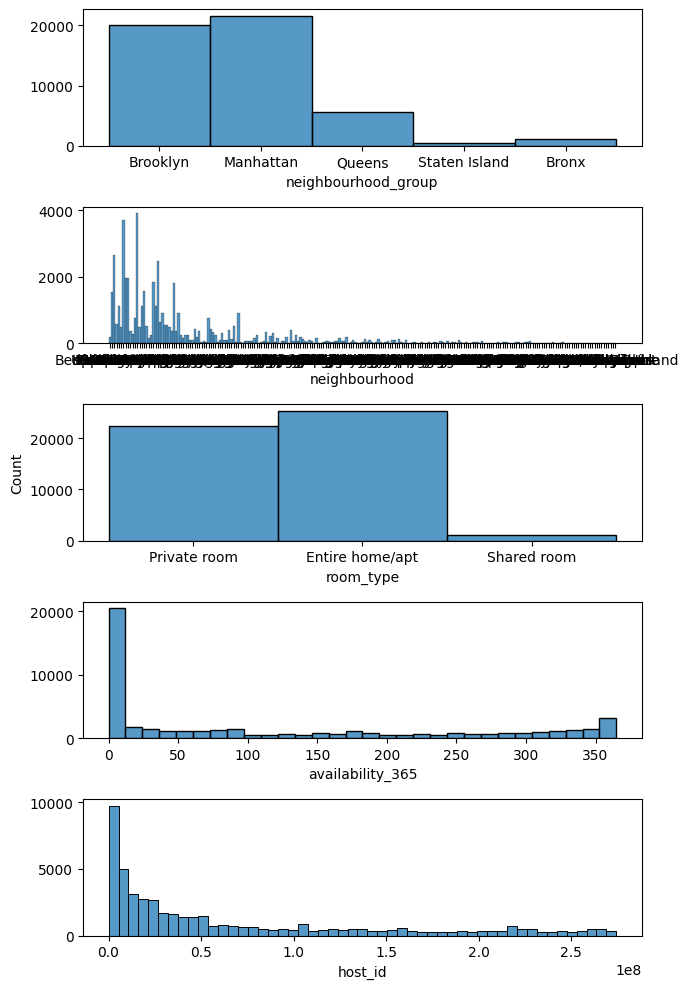

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(5, 1, figsize = (7, 10))

#sns.histplot(ax = axis[0], data = nyc_data, x = "host_id").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0], data = nyc_data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[1], data = nyc_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = nyc_data, x = "room_type")
sns.histplot(ax = axis[3], data = nyc_data, x = "availability_365").set(ylabel = None)
sns.histplot(ax = axis[4], data = nyc_data, x = "host_id").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Observaciones
- Se puede apreciar que las propiedades están distribuidas en varios barrios de NY, concentrandose principalmente en el distrito de Manhattan.
- Mientras Manhattan es el distrito en el que hay más propiedades, Stated Island es el que tiene menos.
- El tipo de airbnb predominante en NY es el departamento/casa completa, hay muy pocos cuya categoría es habitación compartida.
- Hay una gran cantidad de propiedades cuya disponibilidad esta listada como 0, lo que podría indicar una falta de información o información errónea. 
- Existe una gran cantidad de propiedades cuyo host_id esta listado como 0/NaN, lo que indica nuevamente información faltante o errónea,
- Dentro el dataset, de identificó que hay varios hosts que tienen más de una propiedad

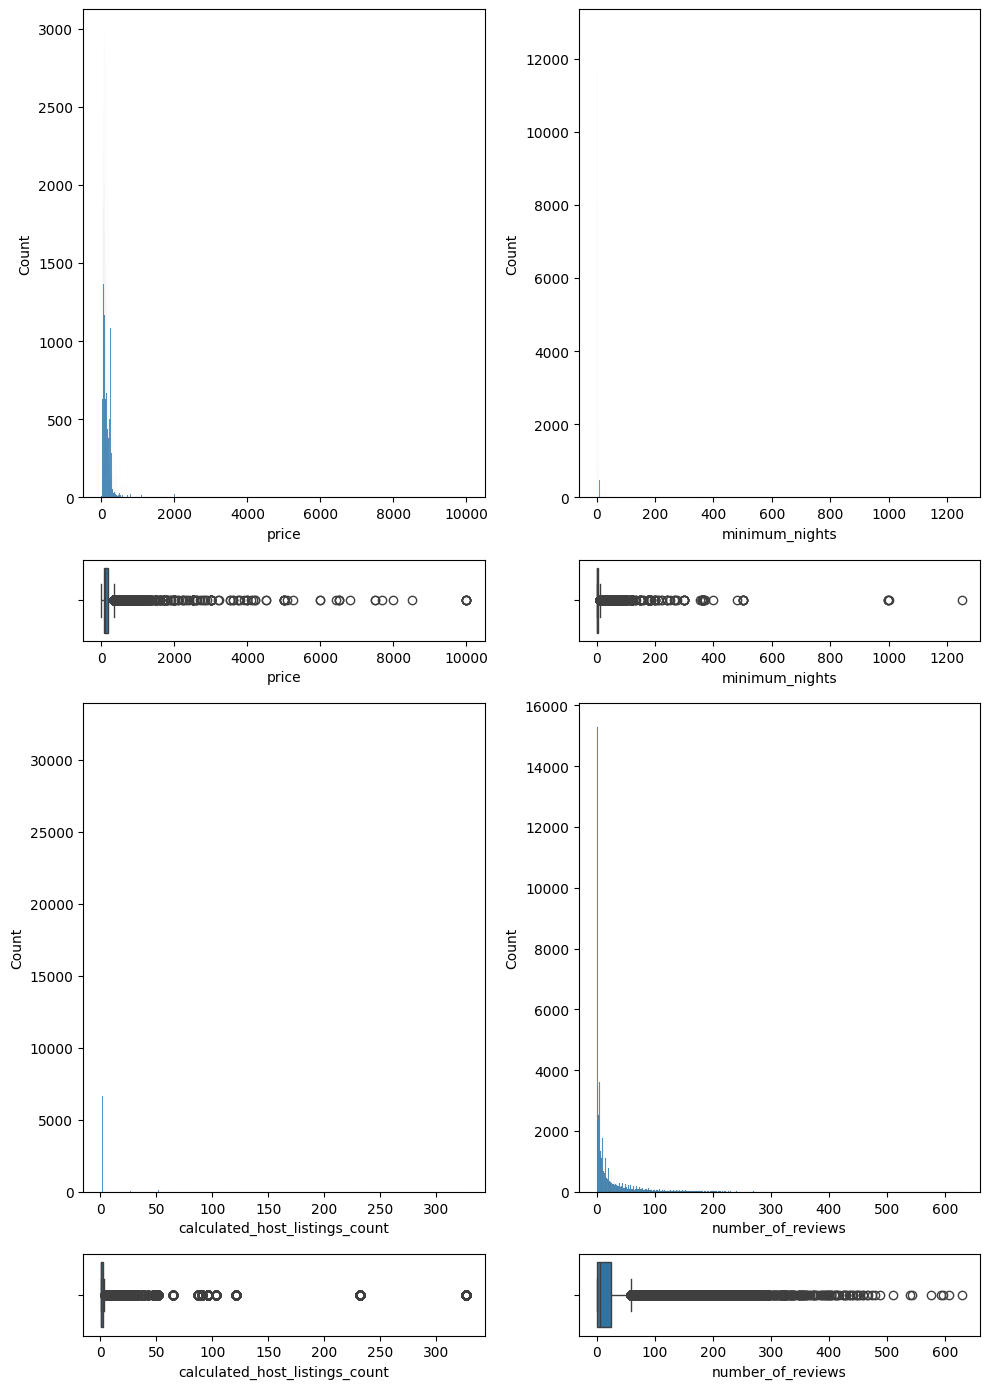

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = nyc_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = nyc_data, x = "price")
sns.histplot(ax = axis[0, 1], data = nyc_data, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = nyc_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = nyc_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 0], data = nyc_data, x = "calculated_host_listings_count")
sns.histplot(ax = axis[2, 1], data = nyc_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 1], data = nyc_data, x = "number_of_reviews")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

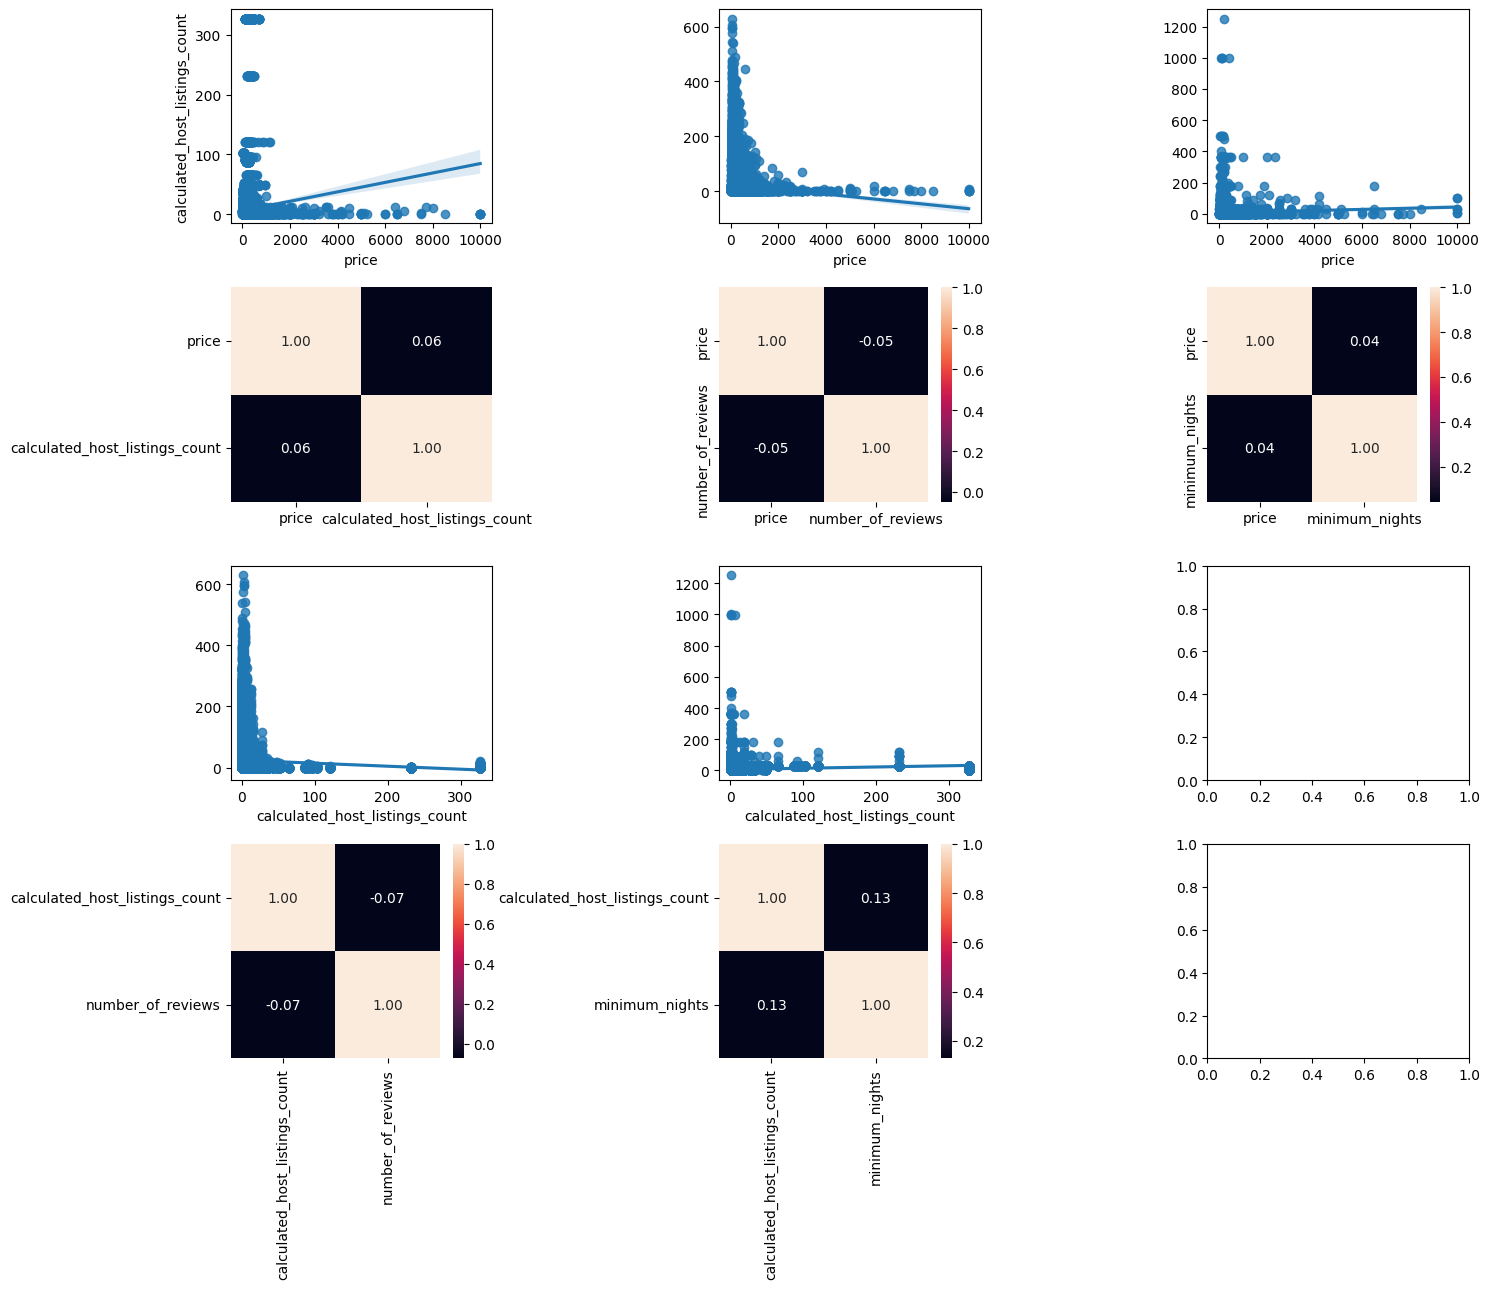

In [10]:
fig, axis = plt.subplots(4, 3, figsize = (15, 13))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = nyc_data, x = "price", y = "calculated_host_listings_count")
sns.heatmap(nyc_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = nyc_data, x = "price", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(nyc_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = nyc_data, x = "price", y = "minimum_nights").set(ylabel=None)
sns.heatmap(nyc_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[2, 0], data = nyc_data, x = "calculated_host_listings_count", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(nyc_data[["calculated_host_listings_count", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = nyc_data, x = "calculated_host_listings_count", y = "minimum_nights").set(ylabel=None)
sns.heatmap(nyc_data[["calculated_host_listings_count", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Mirando los gráficos anteriores, se determina que no hay relaciones entre las variables analizadas (price, calculated_host_listing,count,number_of_rewviews, minimum_nights).

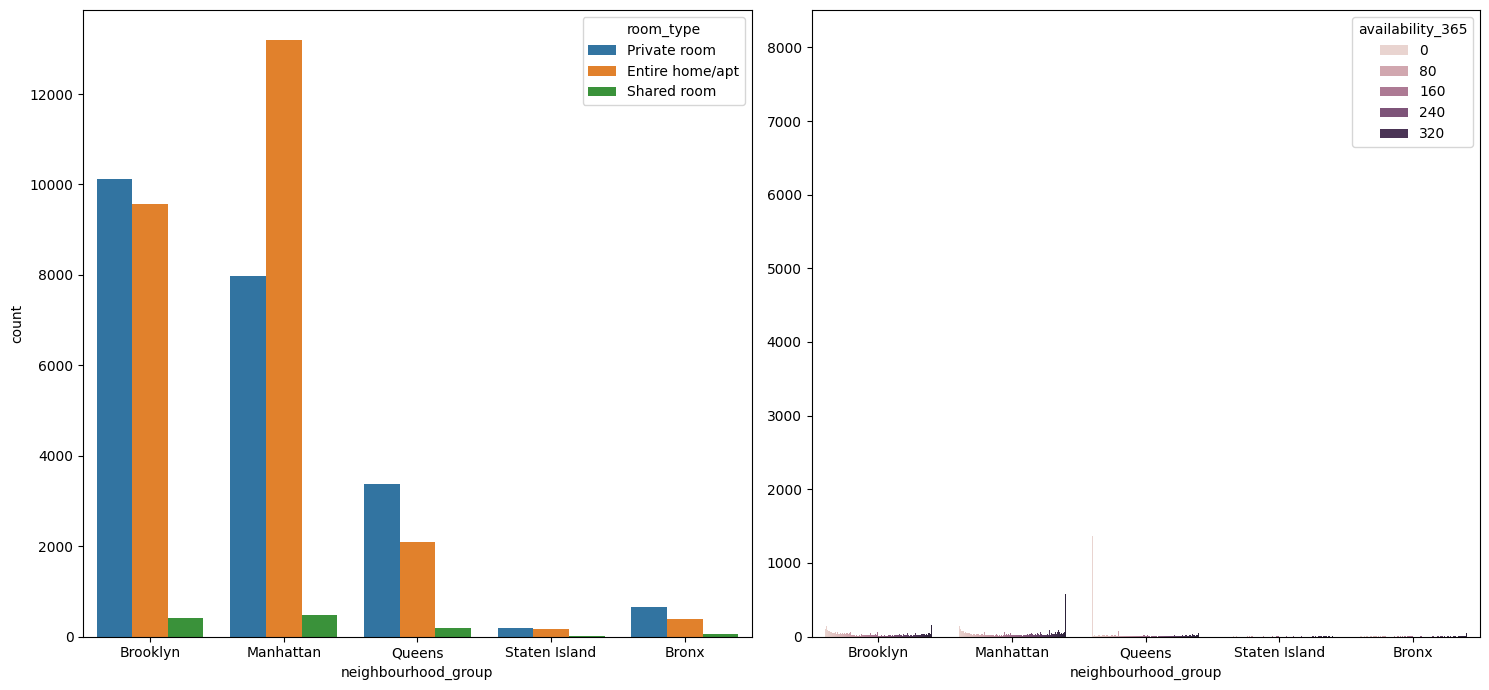

In [11]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))

sns.countplot(ax = axis[0], data = nyc_data, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = nyc_data, x = "neighbourhood_group", hue = "availability_365").set(ylabel = None)

plt.tight_layout()


plt.show()

De los gráficos obtenidos, se concluye lo siguiente:
- A diferencia de los otros distritos, en Manhattan es más común encontrar casas completas en renta que habitaciones privadas/compartidas.
- En NY, es más fácil encontrar una habitación privada que compartida.
- Staten Island es el distrito que tiene el menor número de propiedades disponibles.
- La disponibilidad_365 de propiedades en Brooklyn y Manhattan es mayor que en Queens, Staten Island y Broxn, donde al parecer las fechas de renta son más limitados.

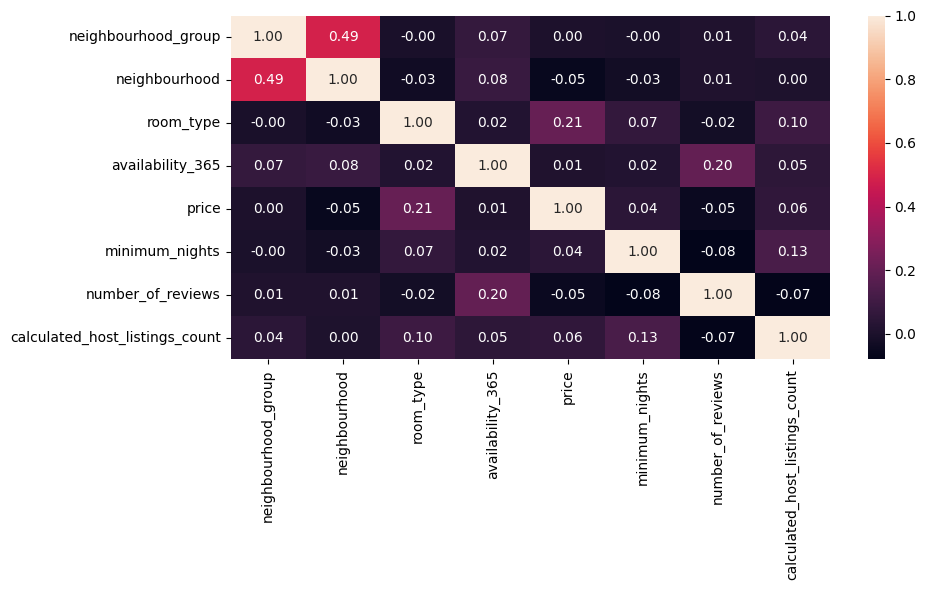

In [12]:
nyc_data["neighbourhood_group"] = pd.factorize(nyc_data["neighbourhood_group"])[0]
nyc_data["neighbourhood"] = pd.factorize(nyc_data["neighbourhood"])[0]
nyc_data["room_type"] = pd.factorize(nyc_data["room_type"])[0]
nyc_data["availability_365"] = pd.factorize(nyc_data["availability_365"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(nyc_data[["neighbourhood_group","neighbourhood" ,"room_type", "availability_365", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Del gráfico anterior, se obtienen las siguientes observaciones:
- neighbourhood_group y neighbourhood muestran una relación positiva y significativa, pues neighbourhood_group es una agrupación de los barrios. De no existir la relación, se podría deducir que alguno de los campos es erróneo.
- Price y room_type tienen una relación de 0.21%, lo cuál tiene sentido pues entre más privado o completo sea el inmueble, el precio será más alto. Si bien existe una relación, el porcentaje es muy bajo para considerarse como una relación fuerte.
- Number_of_reviews y availability_365 también muestran una relación del 0.2%. Esto se podría deber a que entre más estancias haya tenido un inmueble, más posibilidades de tener un review tiene; sin embargo, el porcentaje es muy bajo para ser considerado como una relación fuerte.
- Las demás relaciones se mantienen en cantidades muy bajas para considerarse relevantes.

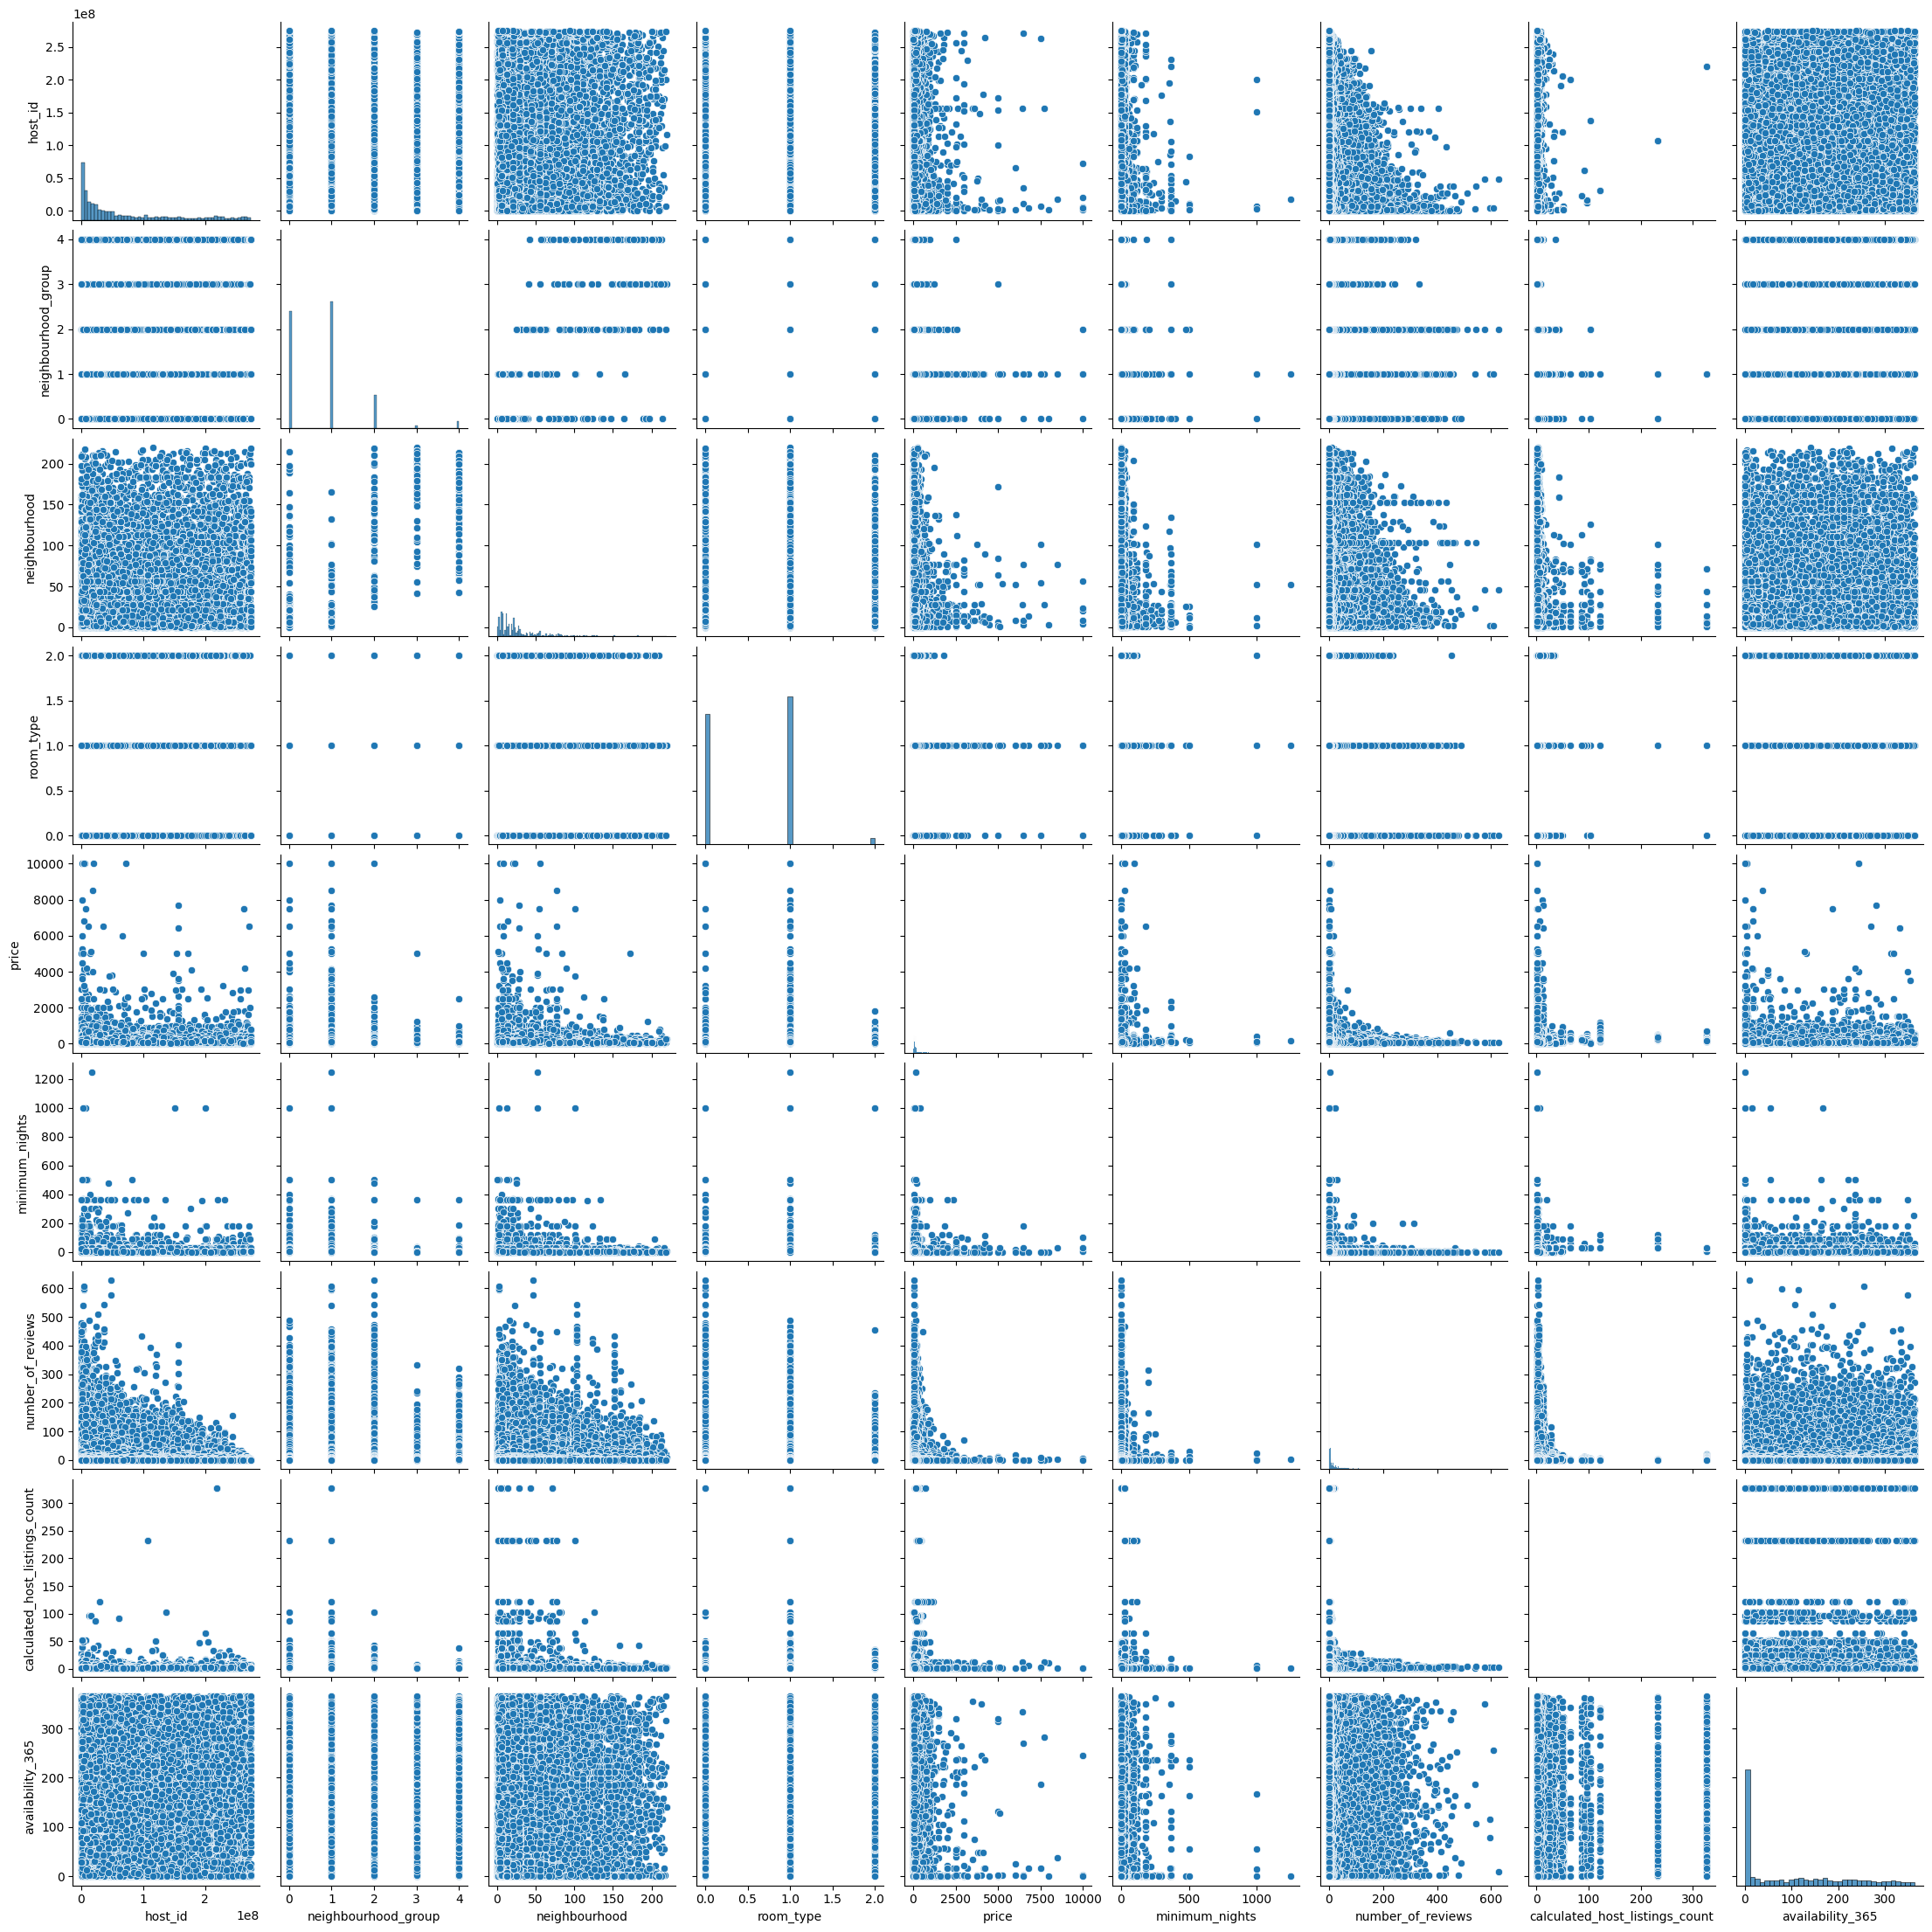

In [13]:
sns.pairplot(data = nyc_data)

In [14]:
nyc_data.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,104.687166
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,113.507109
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,3.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,60.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,194.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


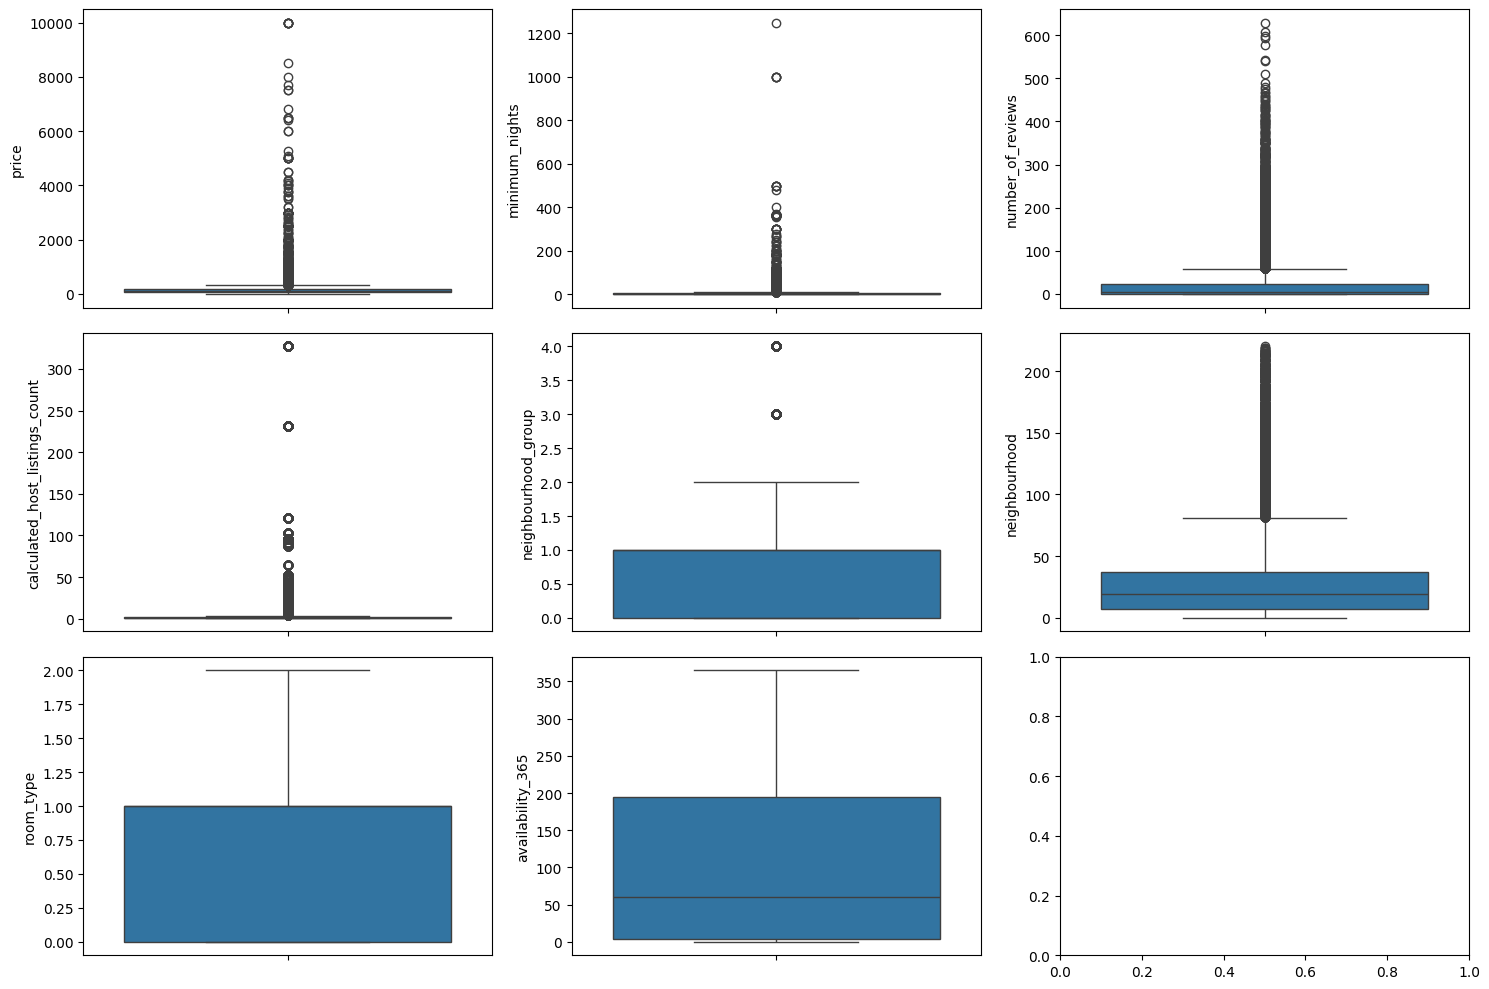

In [15]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = nyc_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = nyc_data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = nyc_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = nyc_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = nyc_data, y = "neighbourhood_group")
sns.boxplot(ax = axis[1, 2], data = nyc_data, y = "neighbourhood")
sns.boxplot(ax = axis[2, 0], data = nyc_data, y = "room_type")
sns.boxplot(ax = axis[2, 1], data = nyc_data, y = "availability_365")

plt.tight_layout()

plt.show()

Como se puede observar en las gráficas anteriores, hay algunos valores que podrían considerarse irregulares y requieren análisis y tratamiento extra, como price y minimum_nights, cuyos valores están muy alejados del promedio

In [16]:
price_stats = nyc_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [18]:
nyc_data[nyc_data["price"] > 334]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,60278,1,14,1,375,180,5,1,49
85,74303,0,32,1,800,1,25,1,68
103,93790,1,11,1,500,4,46,2,81
114,72062,1,19,1,350,2,7,4,90
121,119588,0,10,1,400,2,16,2,97
...,...,...,...,...,...,...,...,...,...
48758,73211393,2,25,1,350,2,0,1,17
48833,29741813,1,43,1,475,2,0,1,234
48839,274079964,0,73,0,800,1,0,1,213
48842,224171371,1,14,1,350,1,0,1,76


Después de analizar la información, se determina que hay casi 3000 registros cuyo precio rebasa los 334, por lo que se determina eliminar todos los registros cuyo precio sea menos a 0, pues un precio negativo indicaría un erro en la información o un valor faltante.

In [19]:
nyc_data = nyc_data[nyc_data["price"] > 0]
nyc_data["price"]

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48884, dtype: int64

Se procede a evaluar minimum_nights, number_of_reviews, y calculated_host_listings_count.


In [20]:
mon_stats = nyc_data["minimum_nights"].describe()
mon_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [21]:
mon_iqr = mon_stats["75%"] - mon_stats["25%"]
upper_limit = mon_stats["75%"] + 1.5 * mon_iqr
lower_limit = mon_stats["25%"] - 1.5 * mon_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(mon_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [22]:
nyc_data[nyc_data["minimum_nights"] > 11]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,7356,0,6,0,60,45,49,1,3
14,11975,1,11,1,120,90,27,1,3
29,21904,1,19,1,180,14,29,1,23
36,7355,0,6,0,35,60,0,1,0
45,49670,0,24,1,150,29,11,1,34
...,...,...,...,...,...,...,...,...,...
48810,274014453,1,8,0,75,30,0,1,236
48843,53966115,0,6,0,45,29,0,2,144
48871,144008701,1,2,0,35,29,0,2,238
48879,540335,0,12,1,120,20,0,1,29


Dado que existen un total de 6605 registros cuyo minimum_nights excede los 11 días, se determina que es conveniente extender un poco el outlier.

In [23]:
nyc_data[nyc_data["minimum_nights"] <= 15]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,0
1,2845,1,1,1,225,1,45,2,1
2,4632,1,2,0,150,3,0,1,0
3,4869,0,3,1,89,1,270,1,2
4,7192,1,4,1,80,10,9,1,3
...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,0,70,2,0,2,76
48891,6570630,0,21,0,40,4,0,2,203
48892,23492952,1,2,1,115,10,0,1,220
48893,30985759,1,7,2,55,1,0,6,149


In [24]:
nyc_data[nyc_data["minimum_nights"] <= 30]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,0
1,2845,1,1,1,225,1,45,2,1
2,4632,1,2,0,150,3,0,1,0
3,4869,0,3,1,89,1,270,1,2
4,7192,1,4,1,80,10,9,1,3
...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,0,70,2,0,2,76
48891,6570630,0,21,0,40,4,0,2,203
48892,23492952,1,2,1,115,10,0,1,220
48893,30985759,1,7,2,55,1,0,6,149


Según la información obtenida, se considero extender el límite a 15 y 30, sin embargo, después de considerar la separación de los cuartiles (4), la media del conjunt (7), y el 3er cuartil, se determino que 15 estaba más cerca a estos valores y la cantidad de registros restantes no disminuía de forma drástica con este cambio. 

In [25]:
nyc_data = nyc_data[nyc_data["minimum_nights"] <= 15]

In [26]:
nyc_data["minimum_nights"].describe()

count    43265.000000
mean         2.962857
std          2.500413
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         15.000000
Name: minimum_nights, dtype: float64

In [27]:
nor_stats = nyc_data["number_of_reviews"].describe()
nor_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [28]:
nor_iqr = nor_stats["75%"] - nor_stats["25%"]
upper_limit = nor_stats["75%"] + 1.5 * nor_iqr
lower_limit = nor_stats["25%"] - 1.5 * nor_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nor_iqr, 2)}")

The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


In [29]:
nyc_data[nyc_data["number_of_reviews"] > 66]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3,4869,0,3,1,89,1,270,1,2
5,7322,1,5,1,200,3,74,1,4
7,8967,1,7,0,79,2,430,1,5
8,7490,1,8,0,79,2,118,1,3
9,7549,1,9,1,150,1,160,4,6
...,...,...,...,...,...,...,...,...,...
40036,232251881,2,46,0,30,1,98,8,99
40049,155691570,2,103,0,45,1,74,5,212
40297,232251881,2,46,0,67,1,95,8,358
42075,244361589,1,71,0,100,1,156,9,94


In [30]:
nyc_data[nyc_data["number_of_reviews"] > 92]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3,4869,0,3,1,89,1,270,1,2
7,8967,1,7,0,79,2,430,1,5
8,7490,1,8,0,79,2,118,1,3
9,7549,1,9,1,150,1,160,4,6
11,7989,1,7,0,85,2,188,1,8
...,...,...,...,...,...,...,...,...,...
36238,217379941,2,152,1,75,1,132,1,244
37093,222098649,2,46,1,20,1,111,1,264
40036,232251881,2,46,0,30,1,98,8,99
40297,232251881,2,46,0,67,1,95,8,358


In [31]:
chlc_stats = nyc_data["calculated_host_listings_count"].describe()
chlc_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [32]:
chlc_iqr = chlc_stats["75%"] - chlc_stats["25%"]
upper_limit = chlc_stats["75%"] + 1.5 * chlc_iqr
lower_limit = chlc_stats["25%"] - 1.5 * chlc_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(chlc_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [33]:
nyc_data[nyc_data["number_of_reviews"] > 3.5]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,0
1,2845,1,1,1,225,1,45,2,1
3,4869,0,3,1,89,1,270,1,2
4,7192,1,4,1,80,10,9,1,3
5,7322,1,5,1,200,3,74,1,4
...,...,...,...,...,...,...,...,...,...
47848,269113892,2,46,1,128,1,5,1,322
47967,30461045,1,1,0,125,1,6,1,186
48031,225118276,0,6,0,75,1,7,1,129
48228,63389796,2,62,1,150,1,5,1,179


In [34]:
nyc_data[nyc_data["number_of_reviews"] > 7]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,0
1,2845,1,1,1,225,1,45,2,1
3,4869,0,3,1,89,1,270,1,2
4,7192,1,4,1,80,10,9,1,3
5,7322,1,5,1,200,3,74,1,4
...,...,...,...,...,...,...,...,...,...
46939,266522456,1,8,0,130,1,9,3,179
46951,155137506,2,178,1,85,1,8,1,243
47161,267680159,1,23,1,300,1,8,1,102
47252,80443454,2,139,0,74,1,10,1,316


Debido a la cantidad de registros que ya se han eliminado en las variables pasadas, y después de considerar el impacto, se decide omitir la eliminación de registros en las dos últimas variables por el momento

In [35]:
nyc_data.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Missing Values
Los resultados de missing values muestran que no existen registros con esta condición, por lo cual se prosigue con el análisis

### Inference of new features
No se encuentran variables que tengan una relación significativa entre sí que puedan generar nuevas features, a excepción de neighbourhood_group y neighbourhood, donde una es la agrupación de la otra. Se considero eliminar neighbourhood, sin embargo, es posible que dentro de los mismos distritos existan barrios cuya reputación sea mejor que la de otros, por lo que esto también podría influir en el análisis final, así que se conservarán ambas

### Feature scaling

Variable objetivo: Price

In [36]:
from sklearn.model_selection import train_test_split

num_variables = ["minimum_nights", "number_of_reviews", "room_type", "calculated_host_listings_count", "availability_365", "neighbourhood"]

# We divide the dataset into training and test samples
X = nyc_data.drop("price", axis = 1)[num_variables]
y = nyc_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
42032,1,19,2,1,86,14
32759,7,12,0,47,263,7
27831,1,13,0,1,338,6
43410,5,15,1,1,282,28
37689,2,16,1,1,173,73


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
42032,-0.786468,-0.135947,2.664318,-0.109281,-0.143258,-0.467557
32759,1.613676,-0.286977,-1.007560,2.049401,1.412342,-0.664507
27831,-0.786468,-0.265401,-1.007560,-0.109281,2.071495,-0.692643
43410,0.813628,-0.222250,0.828379,-0.109281,1.579328,-0.073658
37689,-0.386444,-0.200674,0.828379,-0.109281,0.621359,1.192447


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
42032,0.000000,0.030207,1.0,0.000000,0.235616,0.063636
32759,0.428571,0.019078,0.0,0.141104,0.720548,0.031818
27831,0.000000,0.020668,0.0,0.000000,0.926027,0.027273
43410,0.285714,0.023847,0.5,0.000000,0.772603,0.127273
37689,0.071429,0.025437,0.5,0.000000,0.473973,0.331818


### Step 6: Feature selection

In [40]:
from sklearn.feature_selection import f_classif, SelectKBest


# With a value of k = 7 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel.head()

,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
0,1,19,2,1,86,14
1,7,12,0,47,263,7
2,1,13,0,1,338,6
3,5,15,1,1,282,28
4,2,16,1,1,173,73


In [41]:
X_test_sel.head()

,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
0,3,40,1,1,3,22
1,1,67,1,1,148,15
2,5,1,1,1,3,14
3,5,7,1,1,3,2
4,2,1,0,2,3,4


In [42]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [44]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_titanic_test.csv", index=False)